## Data Preprocessing
Data cleaning and selecting relevant data to perform analysis

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [13]:
# Load data frame
data = pd.read_parquet('recipes.parquet')
data.head()

,RecipeId,Name,AuthorId,AuthorName,CookTime,PrepTime,TotalTime,DatePublished,Description,Images,...,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings,RecipeYield,RecipeInstructions
0,38.0,Low-Fat Berry Blue Frozen Dessert,1533,Dancer,PT24H,PT45M,PT24H45M,1999-08-09 21:46:00+00:00,Make and share this Low-Fat Berry Blue Frozen ...,[https://img.sndimg.com/food/image/upload/w_55...,...,1.3,8.0,29.8,37.1,3.6,30.2,3.2,4.0,None,"[Toss 2 cups berries with sugar., Let stand fo..."
1,39.0,Biryani,1567,elly9812,PT25M,PT4H,PT4H25M,1999-08-29 13:12:00+00:00,Make and share this Biryani recipe from Food.com.,[https://img.sndimg.com/food/image/upload/w_55...,...,16.6,372.8,368.4,84.4,9.0,20.4,63.4,6.0,None,[Soak saffron in warm milk for 5 minutes and p...
2,40.0,Best Lemonade,1566,Stephen Little,PT5M,PT30M,PT35M,1999-09-05 19:52:00+00:00,This is from one of my first Good House Keepi...,[https://img.sndimg.com/food/image/upload/w_55...,...,0.0,0.0,1.8,81.5,0.4,77.2,0.3,4.0,None,"[Into a 1 quart Jar with tight fitting lid, pu..."
3,41.0,Carina's Tofu-Vegetable Kebabs,1586,Cyclopz,PT20M,PT24H,PT24H20M,1999-09-03 14:54:00+00:00,This dish is best prepared a day in advance to...,[https://img.sndimg.com/food/image/upload/w_55...,...,3.8,0.0,1558.6,64.2,17.3,32.1,29.3,2.0,4 kebabs,"[Drain the tofu, carefully squeezing out exces..."
4,42.0,Cabbage Soup,1538,Duckie067,PT30M,PT20M,PT50M,1999-09-19 06:19:00+00:00,Make and share this Cabbage Soup recipe from F...,[https://img.sndimg.com/food/image/upload/w_55...,...,0.1,0.0,959.3,25.1,4.8,17.7,4.3,4.0,None,"[Mix everything together and bring to a boil.,..."


In [14]:
# Get data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522517 entries, 0 to 522516
Data columns (total 28 columns):
 #   Column                      Non-Null Count   Dtype              
---  ------                      --------------   -----              
 0   RecipeId                    522517 non-null  float64            
 1   Name                        522517 non-null  object             
 2   AuthorId                    522517 non-null  int32              
 3   AuthorName                  522517 non-null  object             
 4   CookTime                    439972 non-null  object             
 5   PrepTime                    522517 non-null  object             
 6   TotalTime                   522517 non-null  object             
 7   DatePublished               522517 non-null  datetime64[us, UTC]
 8   Description                 522512 non-null  object             
 9   Images                      522516 non-null  object             
 10  RecipeCategory              521766 non-null 

In [15]:
# Select several columns
df = data[['RecipeId', 'Name', 'TotalTime', 'RecipeInstructions', 'RecipeCategory', 
           'Calories', 'ProteinContent', 'AggregatedRating']]

# Update column names
df.columns = ['recipe_id', 'name', 'total_time', 'instructions', 'category', 'calories',
              'protein', 'rating']
df.head()

,recipe_id,name,total_time,instructions,category,calories,protein,rating
0,38.0,Low-Fat Berry Blue Frozen Dessert,PT24H45M,"[Toss 2 cups berries with sugar., Let stand fo...",Frozen Desserts,170.9,3.2,4.5
1,39.0,Biryani,PT4H25M,[Soak saffron in warm milk for 5 minutes and p...,Chicken Breast,1110.7,63.4,3.0
2,40.0,Best Lemonade,PT35M,"[Into a 1 quart Jar with tight fitting lid, pu...",Beverages,311.1,0.3,4.5
3,41.0,Carina's Tofu-Vegetable Kebabs,PT24H20M,"[Drain the tofu, carefully squeezing out exces...",Soy/Tofu,536.1,29.3,4.5
4,42.0,Cabbage Soup,PT50M,"[Mix everything together and bring to a boil.,...",Vegetable,103.6,4.3,4.5


In [16]:
# Check null columns
df.isnull().sum()

recipe_id            0
name                 0
total_time           0
instructions         0
category           751
calories             0
protein              0
rating          253223
dtype: int64

In [17]:
# Check top 10 category value
df['category'].value_counts().head(10)

category
Dessert          62072
Lunch/Snacks     32586
One Dish Meal    31345
Vegetable        27231
Breakfast        21101
Beverages        16076
Chicken          13249
Meat             13131
Breads           12804
Pork             12603
Name: count, dtype: int64

In [18]:
# Filter data frame to only meat category
df = df[df['category'] == 'Meat'].reset_index(drop=True)
df.head()

,recipe_id,name,total_time,instructions,category,calories,protein,rating
0,106.0,Cajun Beef Burgers,PT1H30M,"[To make sauce: In large saucepan, heat oil ov...",Meat,1012.8,15.9,NaN
1,285.0,Thai Beef Salad,PT1H30M,"[Tear romaine lettuce, red leaf lettuce, and B...",Meat,1259.9,18.2,4.5
2,351.0,Home-Style Meatballs (Albondigas Caseras),PT1H5M,"[In a bowl, combine the beef, veal, and pork w...",Meat,3702.5,200.2,5.0
3,402.0,Calzones,PT40M,"[Thaw bread dough., When it is able to be slic...",Meat,255.0,3.1,5.0
4,579.0,Garlic Meatballs in Lemon Sauce,PT6H20M,[LEMON SAUCE: 8 oz can tomato sauce grated rin...,Meat,5069.0,80.6,NaN


In [19]:
# Filter out the total_time that contains more than an hour
def time_extract(value):
    # Extract only minutes
    if value.startswith('PT') and value.endswith('M') and 'H' not in value:
        return value
    # Extract exactly 1 hour
    elif value == 'PT1H':
        return value
    else:
        return None
    
df['total_time_minute'] = df['total_time'].apply(time_extract)
df.head()

,recipe_id,name,total_time,instructions,category,calories,protein,rating,total_time_minute
0,106.0,Cajun Beef Burgers,PT1H30M,"[To make sauce: In large saucepan, heat oil ov...",Meat,1012.8,15.9,NaN,None
1,285.0,Thai Beef Salad,PT1H30M,"[Tear romaine lettuce, red leaf lettuce, and B...",Meat,1259.9,18.2,4.5,None
2,351.0,Home-Style Meatballs (Albondigas Caseras),PT1H5M,"[In a bowl, combine the beef, veal, and pork w...",Meat,3702.5,200.2,5.0,None
3,402.0,Calzones,PT40M,"[Thaw bread dough., When it is able to be slic...",Meat,255.0,3.1,5.0,PT40M
4,579.0,Garlic Meatballs in Lemon Sauce,PT6H20M,[LEMON SAUCE: 8 oz can tomato sauce grated rin...,Meat,5069.0,80.6,NaN,None


In [20]:
# Replace 1H with 60
df.loc[df['total_time_minute'] == 'PT1H', 'total_time_minute'] = '60'

# Keep digit only
df['total_time_minute'] = df['total_time_minute'].str.replace(r'\D', '', regex=True)

# Drop None rows in total_time_minute
df = df.dropna(subset=['total_time_minute']).reset_index(drop=True)

# Change total_time_minute data type to int
df['total_time_minute'] = df['total_time_minute'].astype(int)
df.head()

,recipe_id,name,total_time,instructions,category,calories,protein,rating,total_time_minute
0,402.0,Calzones,PT40M,"[Thaw bread dough., When it is able to be slic...",Meat,255.0,3.1,5.0,40
1,834.0,Best Hamburger Diane,PT1M,"[Mix the ground round, salt and pepper togethe...",Meat,458.6,26.3,4.5,1
2,1184.0,Thai Beef Curry,PT25M,"[Slice beef thinly., In big pot, stir and cook...",Meat,446.1,32.4,4.0,25
3,1684.0,Shepherd's Pie,PT30M,[Heat the oil n a large frypan and add the oni...,Meat,2391.1,110.8,4.0,30
4,2329.0,Mr. Walker's Feta Burger,PT20M,[Select your favorite pure beef burgers (make ...,Meat,236.8,6.6,4.0,20


In [21]:
# Convert some column names to lowercase
cols = ['name', 'category']
df[cols] = df[cols].apply(lambda x: x.str.lower())

# Remove some special characters in the name column
df['name'] = df['name'].astype(str).str.replace(r"[^a-zA-Z0-9'\-\(\)\s]", '', regex=True)

# Replace some characters
df['name'] = df['name'].str.replace('amp', 'and')
df.head()

,recipe_id,name,total_time,instructions,category,calories,protein,rating,total_time_minute
0,402.0,calzones,PT40M,"[Thaw bread dough., When it is able to be slic...",meat,255.0,3.1,5.0,40
1,834.0,best hamburger diane,PT1M,"[Mix the ground round, salt and pepper togethe...",meat,458.6,26.3,4.5,1
2,1184.0,thai beef curry,PT25M,"[Slice beef thinly., In big pot, stir and cook...",meat,446.1,32.4,4.0,25
3,1684.0,shepherd's pie,PT30M,[Heat the oil n a large frypan and add the oni...,meat,2391.1,110.8,4.0,30
4,2329.0,mr walker's feta burger,PT20M,[Select your favorite pure beef burgers (make ...,meat,236.8,6.6,4.0,20


In [22]:
# Convert instructions column ndarrays to text
df['instructions_text'] = df['instructions'].apply(
    lambda x: "\n".join([f"{i+1}. {step}" for i, step in enumerate(x)]).lower() 
    if isinstance(x, (list, np.ndarray)) else str(x).lower()
)

df.head()

,recipe_id,name,total_time,instructions,category,calories,protein,rating,total_time_minute,instructions_text
0,402.0,calzones,PT40M,"[Thaw bread dough., When it is able to be slic...",meat,255.0,3.1,5.0,40,1. thaw bread dough.\n2. when it is able to be...
1,834.0,best hamburger diane,PT1M,"[Mix the ground round, salt and pepper togethe...",meat,458.6,26.3,4.5,1,"1. mix the ground round, salt and pepper toget..."
2,1184.0,thai beef curry,PT25M,"[Slice beef thinly., In big pot, stir and cook...",meat,446.1,32.4,4.0,25,"1. slice beef thinly.\n2. in big pot, stir and..."
3,1684.0,shepherd's pie,PT30M,[Heat the oil n a large frypan and add the oni...,meat,2391.1,110.8,4.0,30,1. heat the oil n a large frypan and add the o...
4,2329.0,mr walker's feta burger,PT20M,[Select your favorite pure beef burgers (make ...,meat,236.8,6.6,4.0,20,1. select your favorite pure beef burgers (mak...


In [23]:
# Check rows and cols
df.shape

(7098, 10)

## Data Visualization
Some meals have higher or lower calories and protein, but these values are not necessarily outliers. They could simply reflect natural variation in portion sizes

In [24]:
# Filter data frame with selected criteria
df = df[
    (df['rating'] > 4.5) & # Rating over 4.5
    (df['total_time_minute'] < 25) & # Time less than 25 minutes
    (df['protein'] > 30) # High protein meal
]

df = df.reset_index(drop=True)
df.head()

,recipe_id,name,total_time,instructions,category,calories,protein,rating,total_time_minute,instructions_text
0,10428.0,hamburgers,PT20M,[Chop garlic cloves on wooden surface then put...,meat,317.7,30.4,5.0,20,1. chop garlic cloves on wooden surface then p...
1,16624.0,beef souvlaki,PT15M,[Combine spices and oil and press into meat on...,meat,359.7,32.1,5.0,15,1. combine spices and oil and press into meat ...
2,18556.0,steak seasoning for the steak house,PT10M,[Mix well using a commercial mixer with a wire...,meat,2126.6,62.6,5.0,10,1. mix well using a commercial mixer with a wi...
3,26396.0,breaded beef,PT23M,[Have your butcher slice the rump roast on the...,meat,707.6,57.3,5.0,23,1. have your butcher slice the rump roast on t...
4,26542.0,blue plate beef patties,PT17M,"[Beat egg, stir in onions, crumbs, and mustard...",meat,477.1,39.5,5.0,17,"1. beat egg, stir in onions, crumbs, and musta..."


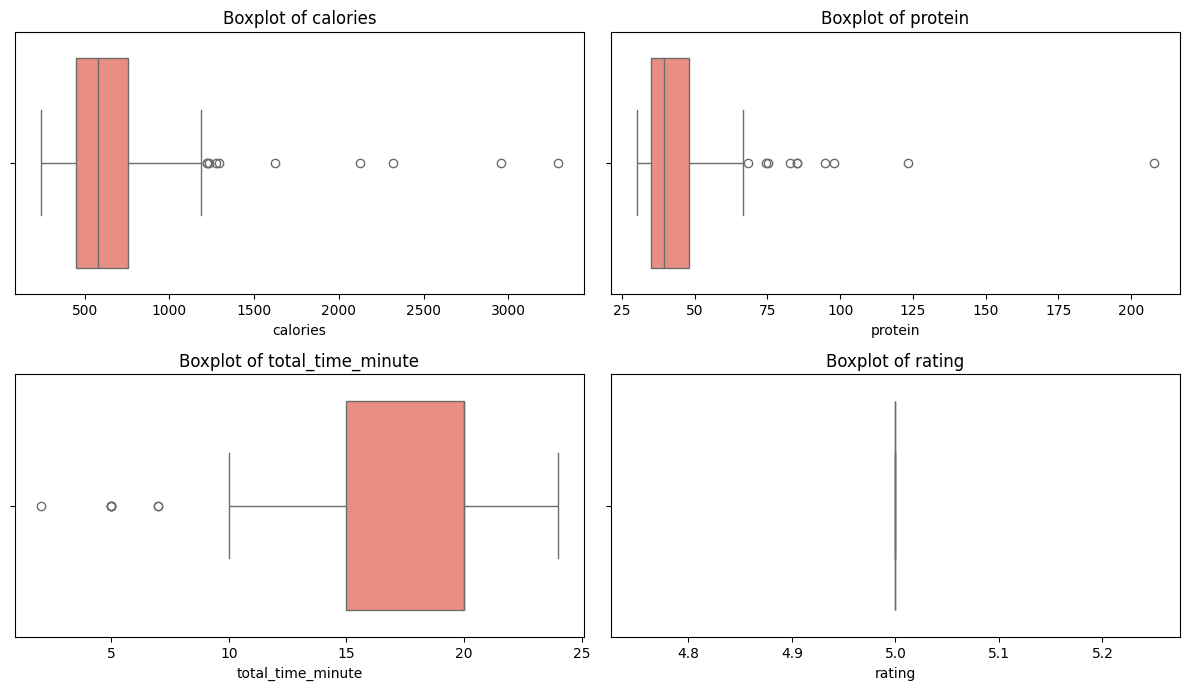

In [25]:
# Boxplot
cols_box = ['calories', 'protein', 'total_time_minute', 'rating']

plt.figure(figsize=(12, 10))
for i, col in enumerate(cols_box, 1):
    plt.subplot(len(cols_box)//2 + 1, 2, i)
    sns.boxplot(x=df[col], color='salmon')
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

In [26]:
# Check null values
df.isnull().sum()

recipe_id            0
name                 0
total_time           0
instructions         0
category             0
calories             0
protein              0
rating               0
total_time_minute    0
instructions_text    0
dtype: int64

In [27]:
# Check rows and columns
df.shape

(130, 10)

In [28]:
# Save csv file
df.to_csv('df_final.csv')

## Recommendation systems
Intialize retrieval-augmented recommender systems using local LLM embeddings

In [29]:
import requests
import faiss
from tqdm import tqdm

In [30]:
# Create a function to combine some selected features into single text string
def combine_recipe_features(row):
    """
    Combine selected key features into a single string for embeddings.
    """ 
    return f"""
    Meal: {row['name']},
    Prep and Cook Time: {row['total_time_minute']},
    Calories: {row['calories']},
    Protein: {row['protein']},
    Instructions: {row['instructions_text']},
    """

# Apply the function
df['combined_features_text'] = df.apply(combine_recipe_features, axis=1)

# Display first few rows of the combined column
df[['name', 'combined_features_text']].head(3)

,name,combined_features_text
0,hamburgers,"\n Meal: hamburgers,\n Prep and Cook Tim..."
1,beef souvlaki,"\n Meal: beef souvlaki,\n Prep and Cook ..."
2,steak seasoning for the steak house,\n Meal: steak seasoning for the steak hous...


In [31]:
# Set dimensionality and initialize FAISS index
dimension = 768
index = faiss.IndexFlatL2(dimension)
X = np.zeros((len(df['combined_features_text']), dimension), dtype=np.float32)

In [32]:
# Generate embeddings using nomic-embed-text
for i, text in enumerate(df['combined_features_text']):
    # Print progress every 10 recipe processed
    if i % 10 == 0:
        print(f"Processed {i}/{len(df)}")
    
    # Send POST request to local model API to generate embeddings
    response = requests.post(
        "http://localhost:11434/api/embeddings",
        json={"model": "nomic-embed-text",
              "prompt": text}
    )
    
    # Extract the embedding from the API response and store it in array X
    embedding = np.array(response.json()['embedding'], dtype=np.float32)
    X[i] = embedding

Processed 0/130
Processed 10/130
Processed 20/130
Processed 30/130
Processed 40/130
Processed 50/130
Processed 60/130
Processed 70/130
Processed 80/130
Processed 90/130
Processed 100/130
Processed 110/130
Processed 120/130


In [33]:
# Add embeddings (X) to FAISS index
index.add(X)

# Save the index
faiss.write_index(index, 'recipe_index')

In [34]:
# Load the index 
# index = faiss.read_index('recipe_index')

In [35]:
# Create prompt for user input
user_ingredients = input('Enter your available ingredients at home (comma-separated): ').strip()

# Generate embeddings for user input
response = requests.post(
        "http://localhost:11434/api/embeddings",
        json={"model": "nomic-embed-text",
              "prompt": user_ingredients}
)
embedding = np.array(response.json()['embedding']).reshape(1, -1)

# Search for top 2 most similar recipes
k = 2
distances, indices = index.search(embedding, k)

# Display the results
print("\nWhat's cooking for today!\n")
for i in range(len(indices[0])):
    meal_index = indices[0][i]
    name = df['name'].iloc[meal_index]
    time = df['total_time_minute'].iloc[meal_index]
    calories = df['calories'].iloc[meal_index]
    protein = df['protein'].iloc[meal_index]
    instructions = df['instructions_text'].iloc[meal_index]

    # Convert index to option letter
    option_letter = chr(65 + i)

    print(f"Option {option_letter}\n")
    print(f"1. Meal: {name}")
    print(f"2. Prep and Cook Time: {time} minutes")
    print(f"3. Calories: {calories}")
    print(f"4. Protein: {protein}")
    print("5. Instructions:")

    steps = instructions.split("\n") if isinstance(instructions, str) else instructions
    for step in steps:
        if step.strip():
            print(f"   {step.strip()}")
    print('\n')


What's cooking for today!

Option A

1. Meal: beef patties with beefy mushroom gravy
2. Prep and Cook Time: 15 minutes
3. Calories: 445.5
4. Protein: 37.1
5. Instructions:
   1. add the egg and bread crumbs to the ground beef and mix well.
   2. shape into 4 to 6 patties.
   3. brown both sides in ungreased skillet, over medium heat, not cooking them completely here.
   4. drain off the fat.
   5. spoon over the patties the undiluted beefy-mushroom soup.
   6. cover the skillet and simmer a few minutes, spooning the gravy over the patties occasionally.
   7. note: sometimes i use only 1 lb of ground beef and make 4 patties.  this is the only change i make.


Option B

1. Meal: mushroom swiss burger
2. Prep and Cook Time: 17 minutes
3. Calories: 547.8
4. Protein: 40.0
5. Instructions:
   1. preheat broiler with oven rack about 6 inches from direct heat source.
   2. preheat oil in a small skillet set over medium heat. add mushrooms, garlic and salt and cook until mushrooms have release